In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
data = pd.read_csv('depressionDataSet.csv', header=0)
data = data.dropna()
data.drop(['Whichyear','Gender','Yourlocation','happywithlivingplace','donerecreationalactivitytoday','Age','Relationshipstatus', 'Understandingwithfamily','feelingpressureinyourstudy','supportsyouyouracademiclife','usedanysocialmedia','satisfiedwithmeal','feelingSick/healt issues'], axis=1, inplace=True)
data

,feelingrightnow,ExpressFeeling,Areyouhappyinancialy,succeededInEducationalinstitution,satisfiedwithacademicresult,haveinferioritycomplex,sleepAtNight
0,Very good,100,Yes,5,Yes,No,8
1,Normal,51,No,3,Yes,Maybe,8
2,Good,87,Yes,4,Yes,No,7
3,Bad,37,Yes,1,Yes,Maybe,5
4,Normal,56,No,4,No,No,7
...,...,...,...,...,...,...,...
606,Very bad,10,No,2,No,No,4
607,Normal,75,Yes,4,Yes,No,8
608,Good,80,Yes,5,No,No,7
609,Normal,55,No,3,No,No,5


In [2]:
dummies = pd.get_dummies(data.feelingrightnow)
merged = pd.concat([data,dummies],axis='columns')
final = merged.drop(['feelingrightnow','Normal'], axis='columns') #!!dummy trap
final

,ExpressFeeling,Areyouhappyinancialy,succeededInEducationalinstitution,satisfiedwithacademicresult,haveinferioritycomplex,sleepAtNight,Bad,Good,Very bad,Very good
0,100,Yes,5,Yes,No,8,0,0,0,1
1,51,No,3,Yes,Maybe,8,0,0,0,0
2,87,Yes,4,Yes,No,7,0,1,0,0
3,37,Yes,1,Yes,Maybe,5,1,0,0,0
4,56,No,4,No,No,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
606,10,No,2,No,No,4,0,0,1,0
607,75,Yes,4,Yes,No,8,0,0,0,0
608,80,Yes,5,No,No,7,0,1,0,0
609,55,No,3,No,No,5,0,0,0,0


In [3]:
dummies = pd.get_dummies(final.Areyouhappyinancialy)
merged = pd.concat([final,dummies],axis='columns')
final2 = merged.drop(['Areyouhappyinancialy','No'], axis='columns')

In [4]:
dummies = pd.get_dummies(final2.satisfiedwithacademicresult)
merged = pd.concat([final2,dummies],axis='columns')
final3 = merged.drop(['satisfiedwithacademicresult','Yes'], axis='columns')
dummies = pd.get_dummies(final3.haveinferioritycomplex)
merged = pd.concat([final3,dummies],axis='columns')
final4 = merged.drop(['haveinferioritycomplex'], axis='columns')
df = final4.loc[:,~final4.columns.duplicated()]
df

,ExpressFeeling,succeededInEducationalinstitution,sleepAtNight,Bad,Good,Very bad,Very good,No,Maybe,Yes
0,100,5,8,0,0,0,1,0,0,0
1,51,3,8,0,0,0,0,0,1,0
2,87,4,7,0,1,0,0,0,0,0
3,37,1,5,1,0,0,0,0,1,0
4,56,4,7,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
606,10,2,4,0,0,1,0,1,0,0
607,75,4,8,0,0,0,0,0,0,0
608,80,5,7,0,1,0,0,1,0,0
609,55,3,5,0,0,0,0,1,0,0


In [5]:
X = df.values[:,1:10]  #X er Dim(231,9)
y = df.values[:,0:1]   #Y er Dim(231,1)

In [6]:
#X er range jeno same thake
def feature_normalize(X):
  mu = np.mean(X, axis = 0)  
  sigma = np.std(X, axis= 0, ddof = 1)  
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma

In [7]:
X, mu, sigma = feature_normalize(X)

In [8]:
m = len(y)
X = np.hstack((np.ones((m,1)), X))

In [9]:
X

array([[ 1.        ,  1.41108304,  0.85709792, ..., -0.98135185,
        -0.30153337, -0.21064592],
       [ 1.        , -0.32541593,  0.85709792, ..., -0.98135185,
         3.31095469, -0.21064592],
       [ 1.        ,  0.54283356,  0.27000506, ..., -0.98135185,
        -0.30153337, -0.21064592],
       ...,
       [ 1.        ,  1.41108304,  0.27000506, ...,  1.01733475,
        -0.30153337, -0.21064592],
       [ 1.        , -0.32541593, -0.90418066, ...,  1.01733475,
        -0.30153337, -0.21064592],
       [ 1.        ,  1.41108304,  0.85709792, ..., -0.98135185,
        -0.30153337, -0.21064592]])

In [10]:
#J = 1/2m * sum((Ypredicted-y)(Ypredicted-y))
def compute_cost(X, y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  transPose = errors.T
  J = 1/(2 * m) * (transPose.dot(errors))  
  return J

In [11]:
#theta = theta - (alpha/m)((Ypredicted-y)*X)
def gradient_descent(X, y, theta, alpha, iterations):
  cost_history = np.zeros(iterations)
  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = compute_cost(X, y, theta)    

  return theta, cost_history

In [12]:
theta = np.zeros((10,1))
iterations = 400;
alpha = 0.15;

In [13]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

In [14]:
# Predict : X = [3,7,1,0,0,1,0,0,0] Equvalent to [succeededInEducationalinstitution,sleepAtNight,Bad,Good,Very bad,Very good,No,Maybe,Yes]
normalize_test_data = ((np.array([3,7,1,0,0,1,0,0,0]) - mu) / sigma)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
ExpressFeeling = normalize_test_data.dot(theta)
print('Predicted Express Feeling ', ExpressFeeling)

Predicted Express Feeling  [66.42085979]


Text(0.5, 1.0, 'Gradient descent')

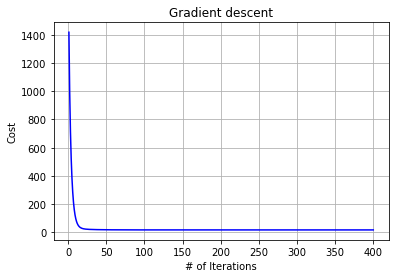

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("# of Iterations")
plt.ylabel("Cost")
plt.title("Gradient descent")